In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive

pd.set_option('display.max_rows', None)

In [2]:
drive.mount('/content/drive')
folder = '/content/drive/MyDrive/Results/'

Mounted at /content/drive


In [3]:
system = 'TPU'

with open(f'{folder}{system}_tune_results_dict_final.json') as f:
  tune_results_dict = json.load(f)

with open(f'{folder}{system}_clf_results_dict_final.json') as f:
  clf_results_dict = json.load(f)

In [4]:
tpu_tune_results = pd.DataFrame([])

for i in tune_results_dict.keys():
  tpu_tune_results = pd.concat([tpu_tune_results, pd.json_normalize(tune_results_dict[i])])


tpu_clf_results = pd.DataFrame([])

for i in clf_results_dict.keys():
  tpu_clf_results = pd.concat([tpu_clf_results, pd.json_normalize(clf_results_dict[i])])

In [5]:
tpu_tune_results.shape

(1200, 11)

In [6]:
tpu_tune_results.head(15)

,Dataset,Preprocessing,Features,Training Size,Vectorizer,Classifier,Best Parameters,Best Score,Duration (m),System,Cost (€)
0,hate_speech,Clean Text,All,500,TfidfVectorizer,LogisticRegression,"(max_df=0.5, max_features=5000, ngram_range=(1...",0.814,0.22,TPU,0.0007
0,hate_speech,Clean Text,All,500,CountVectorizer,LogisticRegression,"(max_df=0.5, max_features=1000, ngram_range=(1...",0.824,0.04,TPU,0.0001
0,hate_speech,Clean Text,All,500,FastText,LogisticRegression,Default,1.000,0.01,TPU,0.0000
0,hate_speech,Clean Text,All,500,TfidfVectorizer,SVC,"(max_df=0.5, max_features=5000, ngram_range=(1...",0.822,0.02,TPU,0.0001
0,hate_speech,Clean Text,All,500,CountVectorizer,SVC,"(max_df=0.5, max_features=1000, ngram_range=(1...",0.810,0.02,TPU,0.0001
0,hate_speech,Clean Text,All,500,FastText,SVC,Default,0.938,0.01,TPU,0.0000
0,hate_speech,Clean Text,All,500,TfidfVectorizer,BaggingClassifier,"(max_df=0.5, ngram_range=(1, 3), norm=None)",0.830,0.14,TPU,0.0005
0,hate_speech,Clean Text,All,500,CountVectorizer,BaggingClassifier,"(max_df=0.75, max_features=1000, ngram_range=(...",0.832,0.09,TPU,0.0003
0,hate_speech,Clean Text,All,500,FastText,BaggingClassifier,Default,0.996,0.02,TPU,0.0001
0,hate_speech,Clean Text,All,500,TfidfVectorizer,RandomForestClassifier,"(max_df=0.5, max_features=10000, ngram_range=(...",0.796,0.02,TPU,0.0001


In [7]:
# tune_results = pd.concat([tune_results, tpu_tune_results])
# clf_results = pd.concat([clf_results, tpu_clf_results])

tune_results = tpu_tune_results
clf_results = tpu_clf_results

<Axes: xlabel='Duration (m)', ylabel='Best Score'>

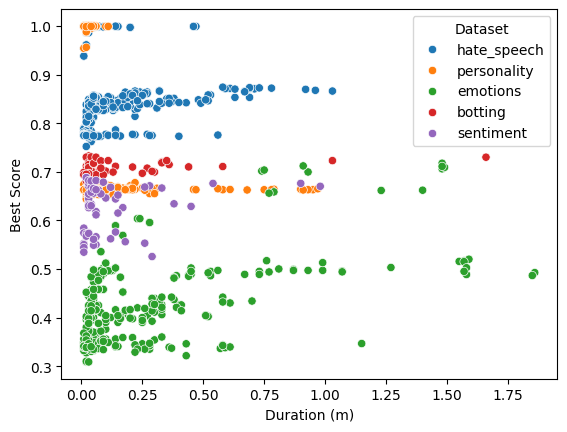

In [9]:
sns.scatterplot(x = tune_results['Duration (m)'], y = tune_results['Best Score'], hue = tune_results['Dataset'])

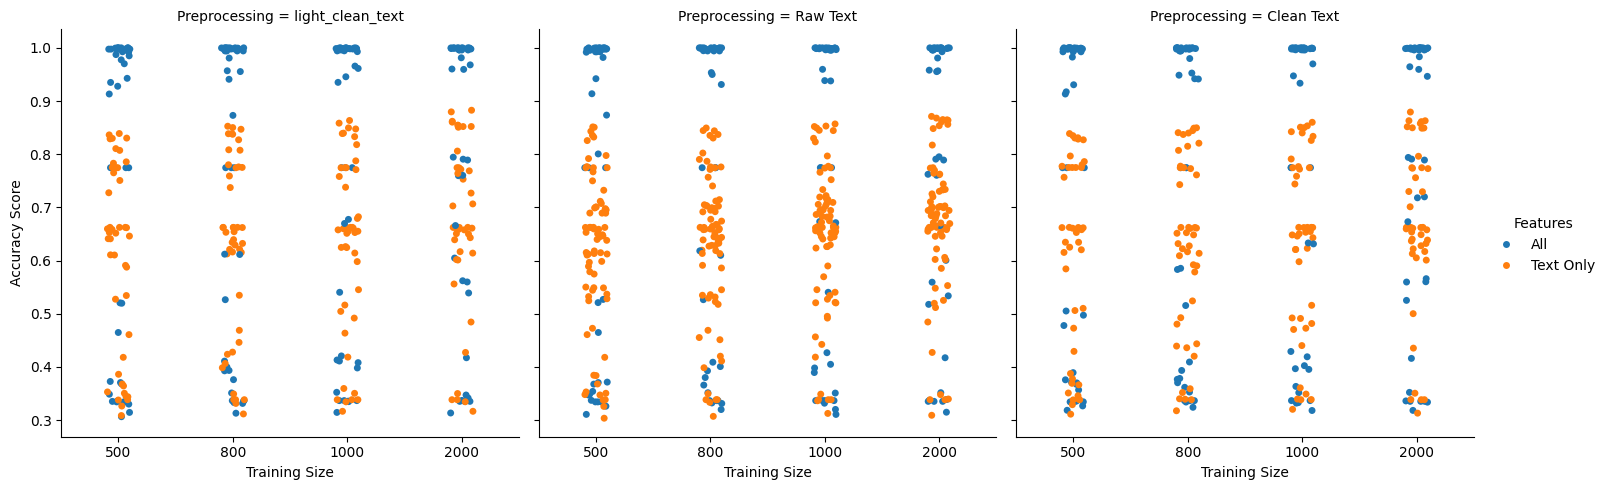

In [ ]:
sns.catplot(y = clf_results['Accuracy Score'], col = clf_results['Preprocessing'], x = clf_results['Training Size'], hue = clf_results['Features'])

Dataset: hate_speech


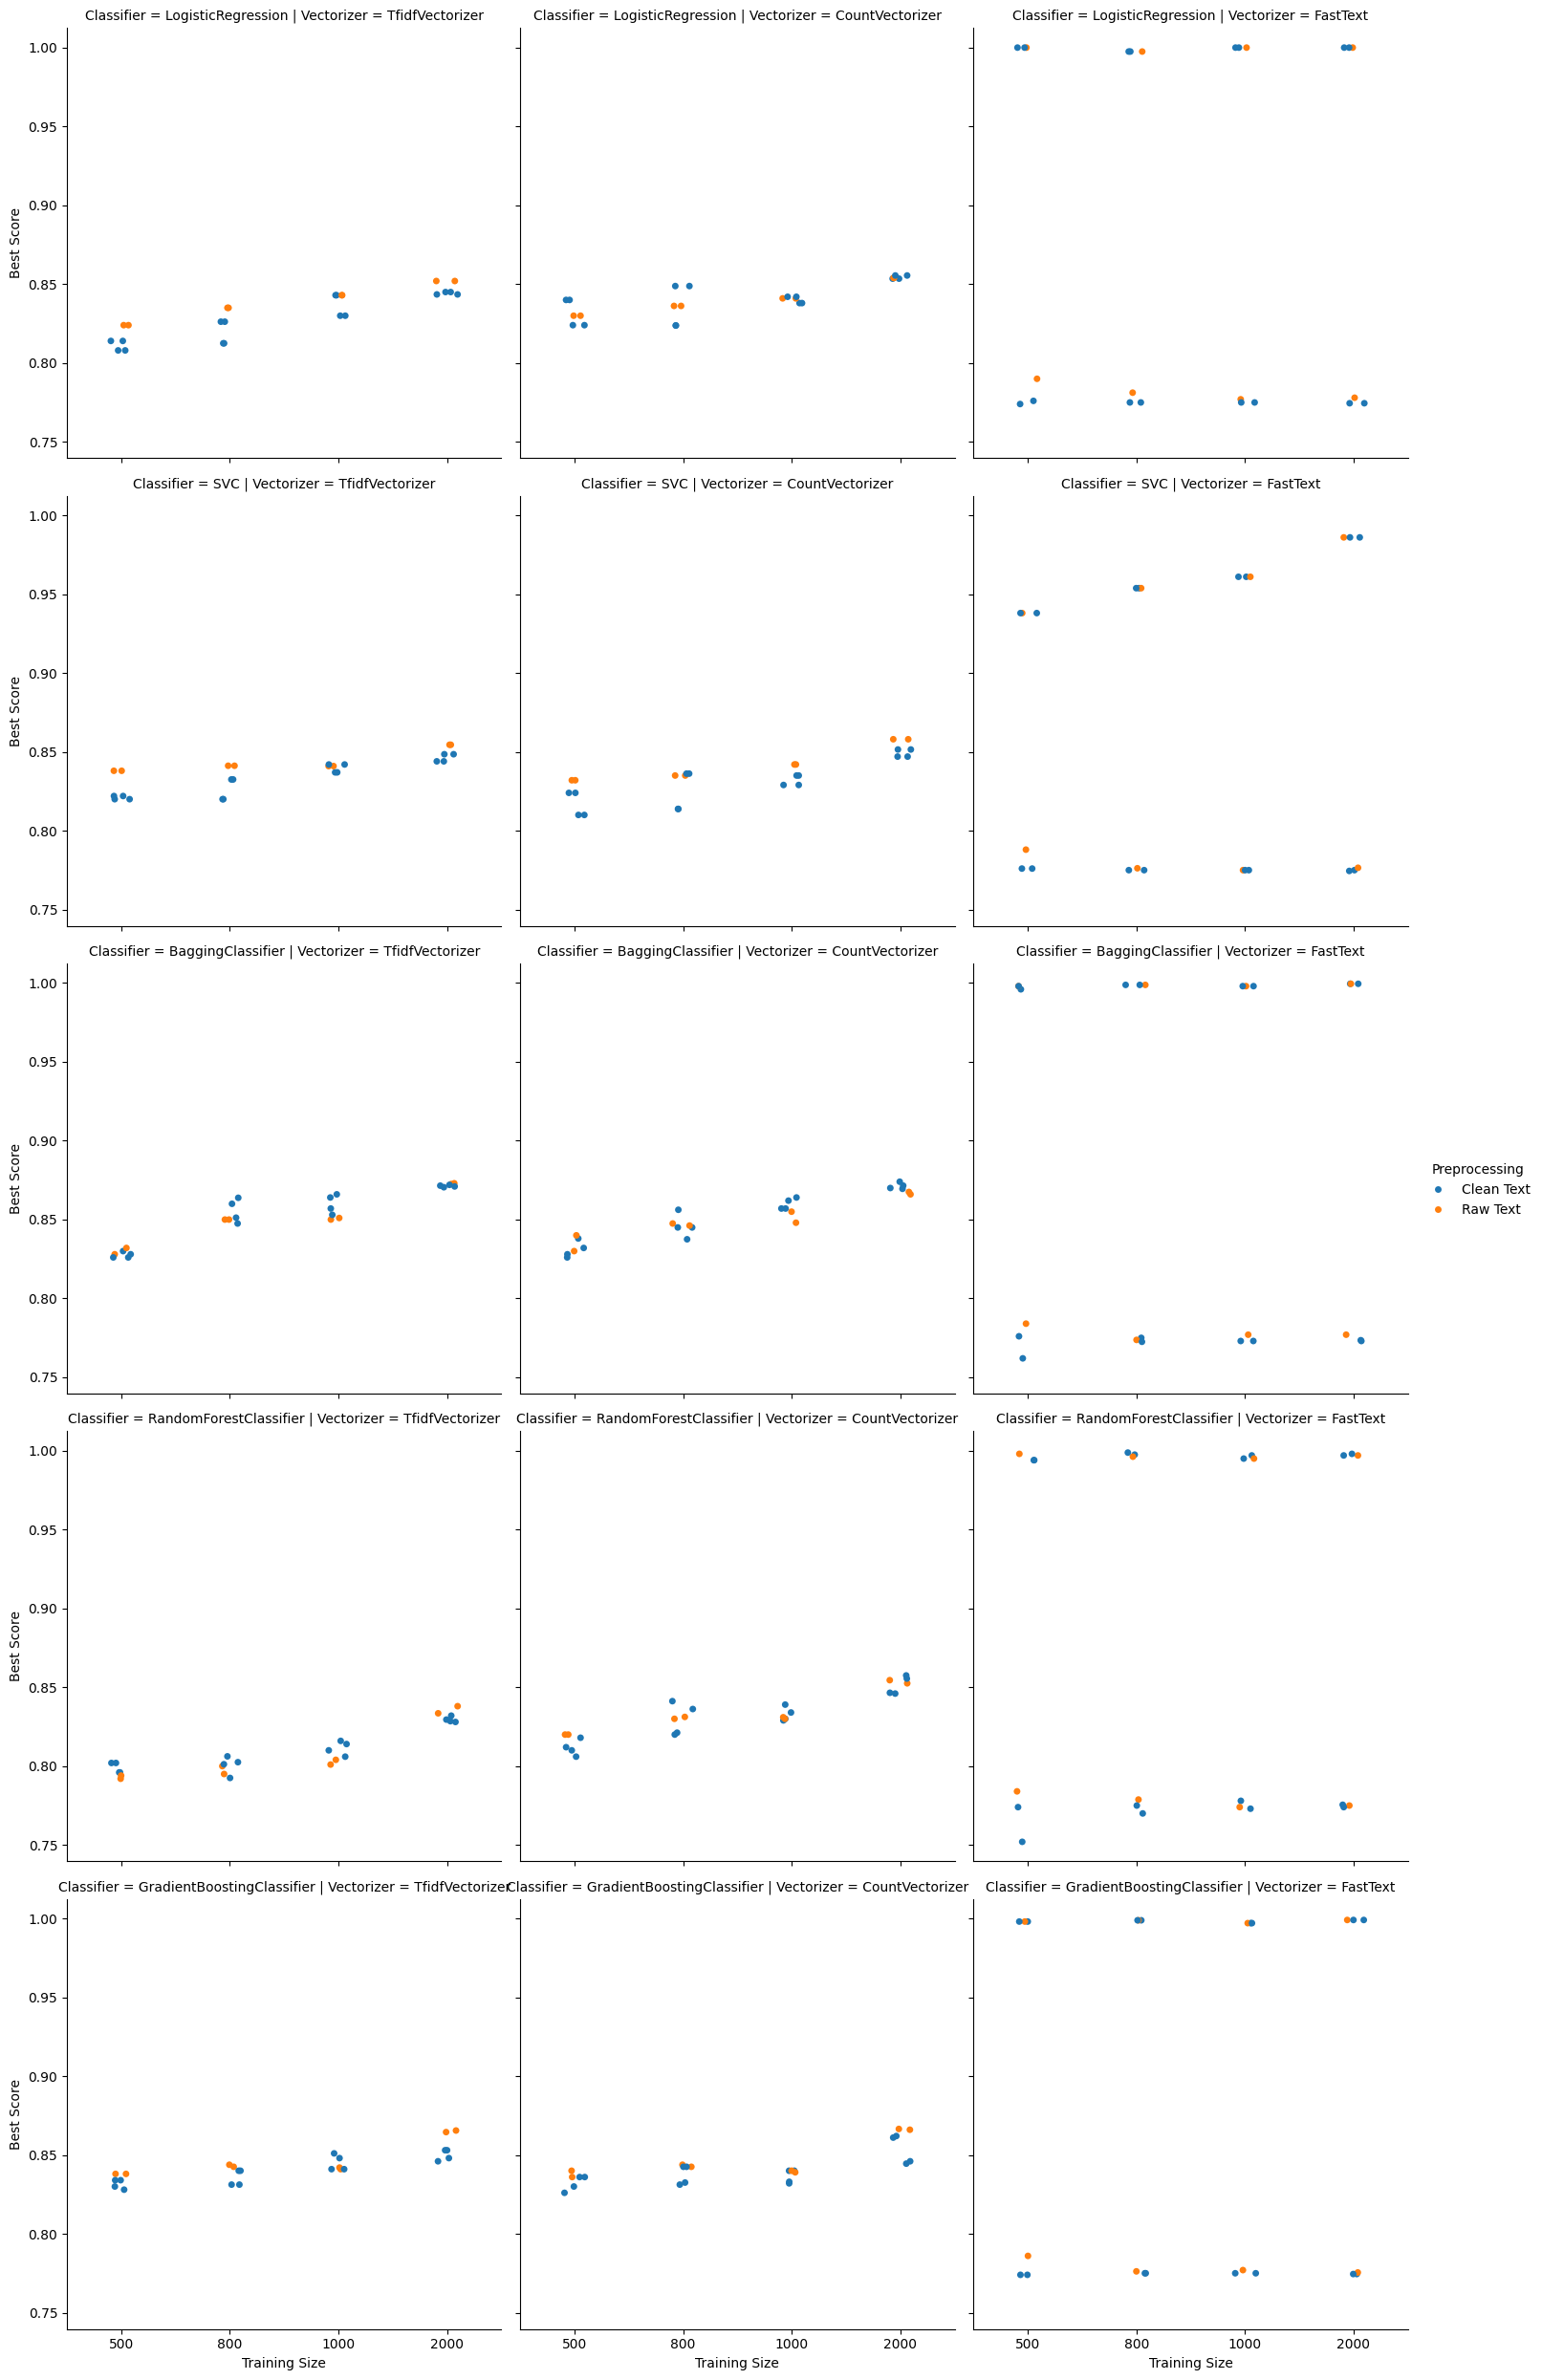

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Dataset: personality


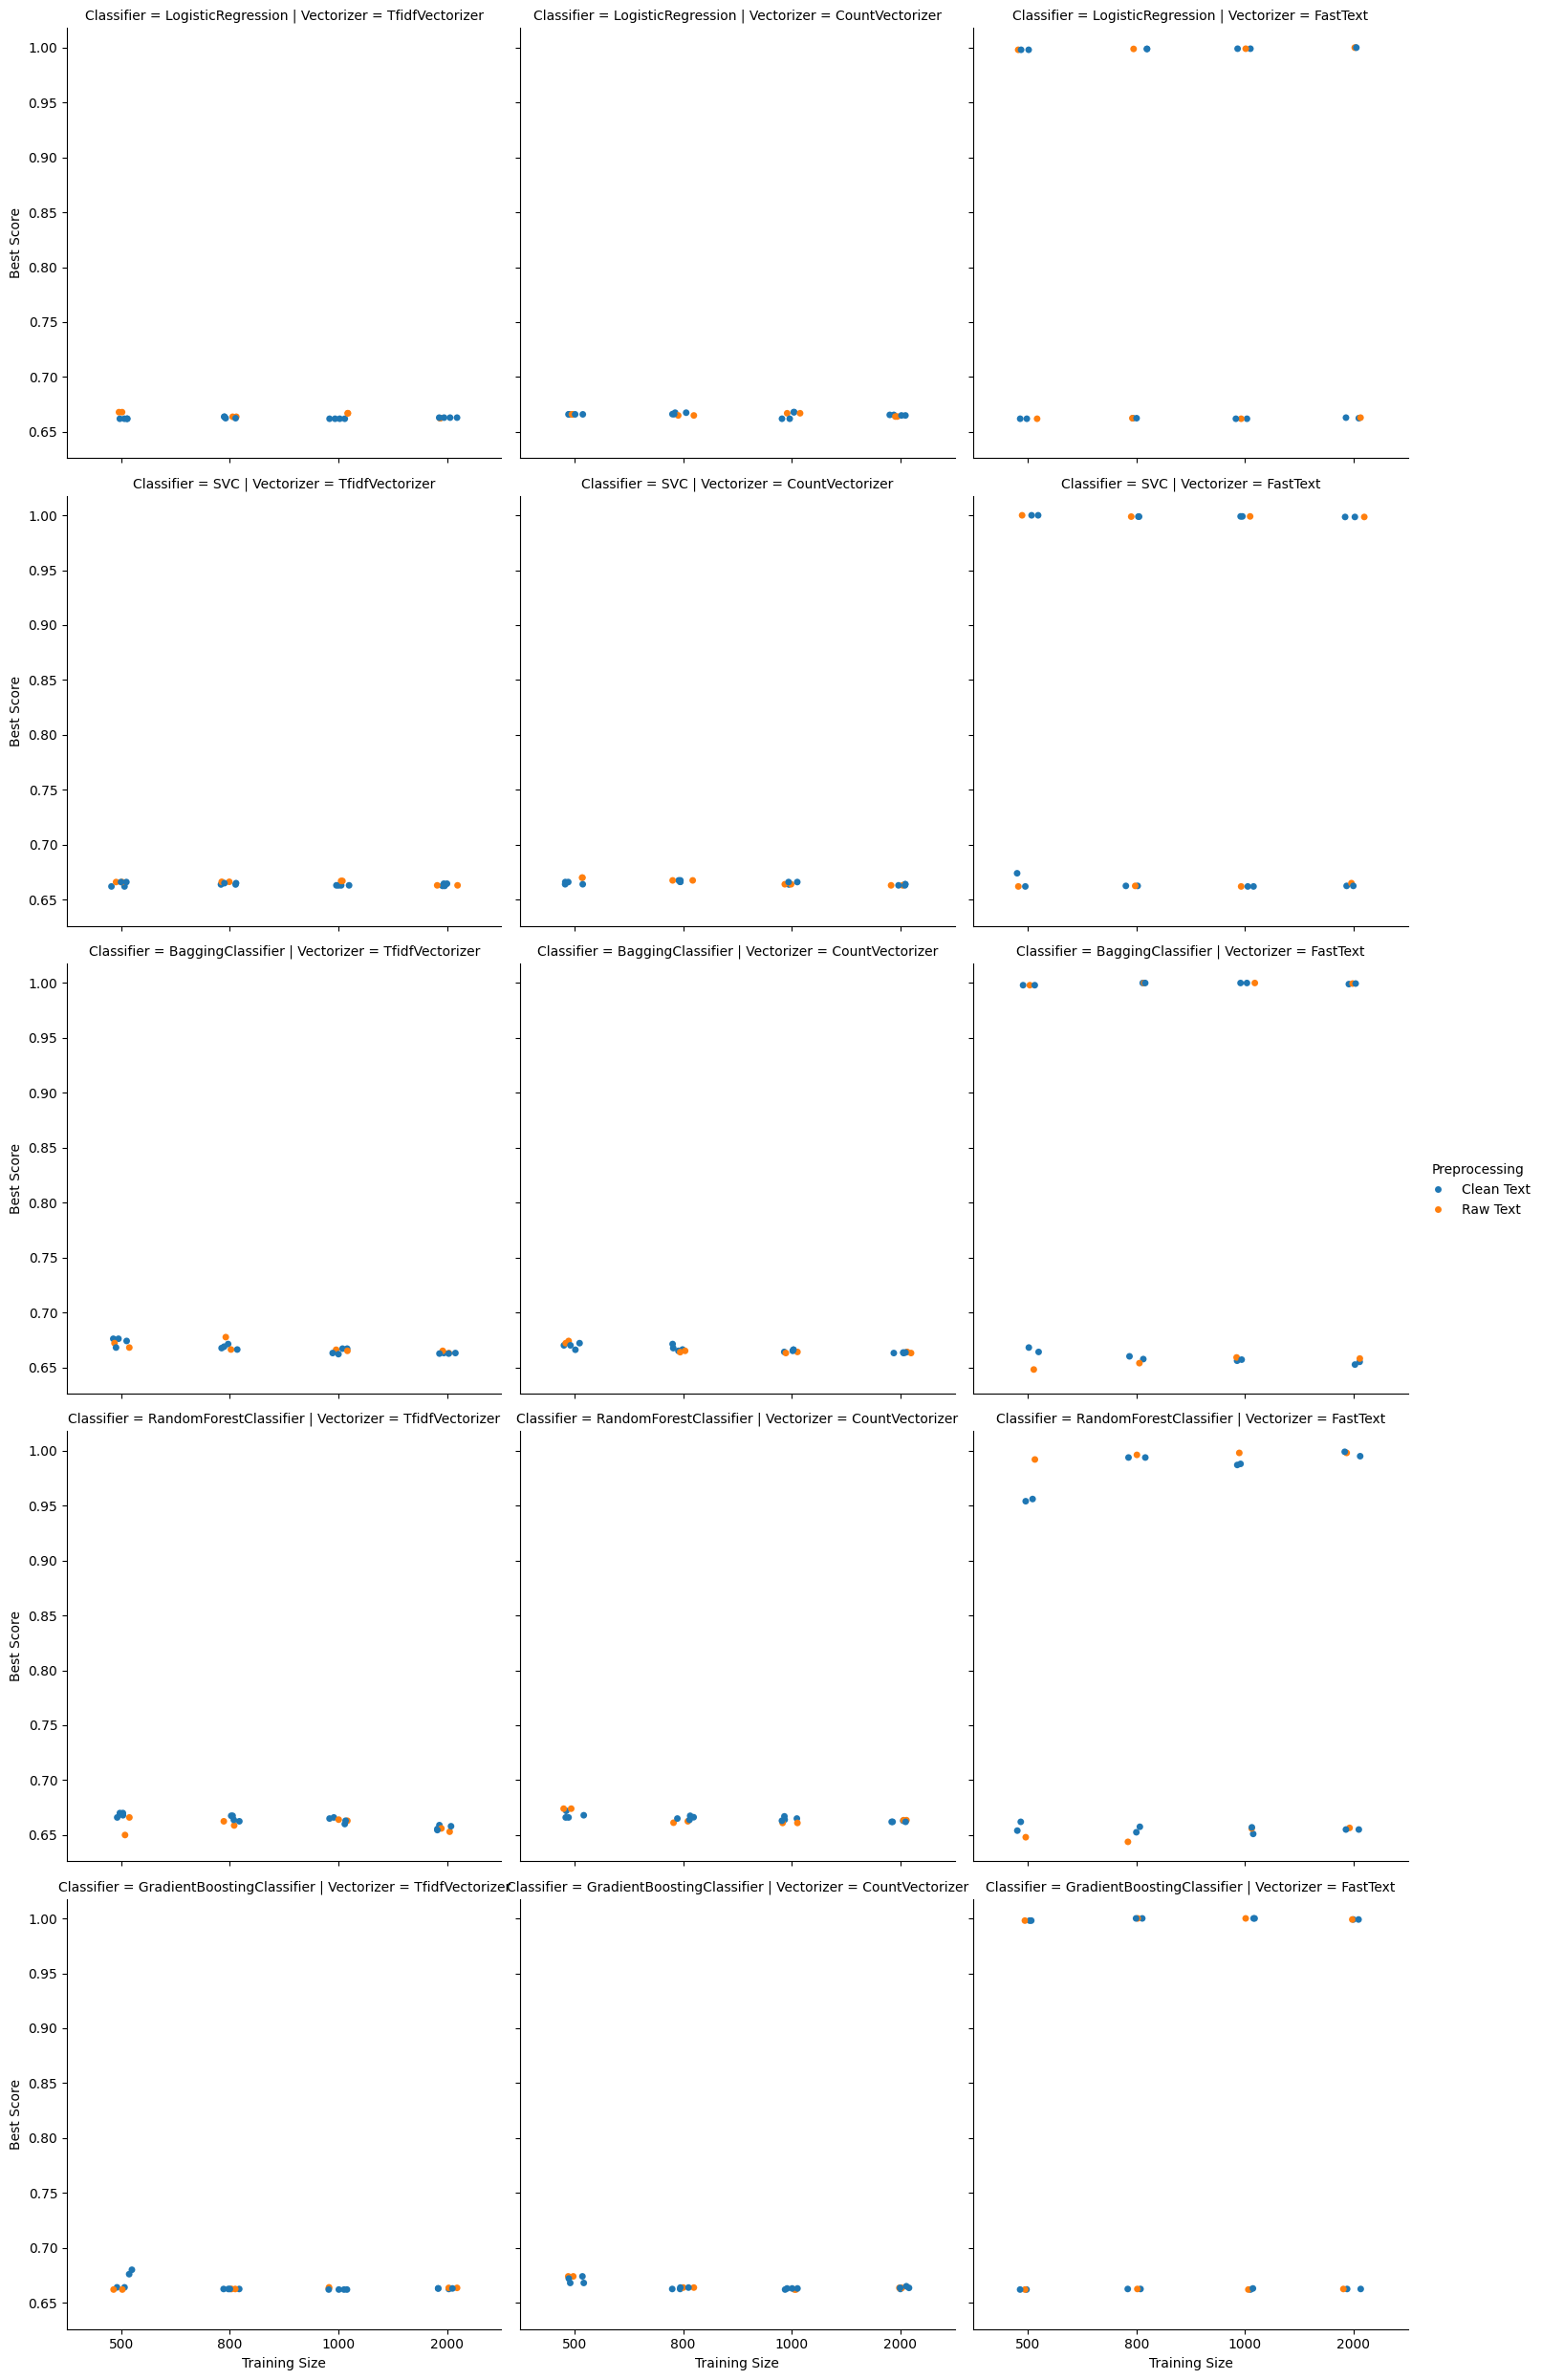

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Dataset: emotions


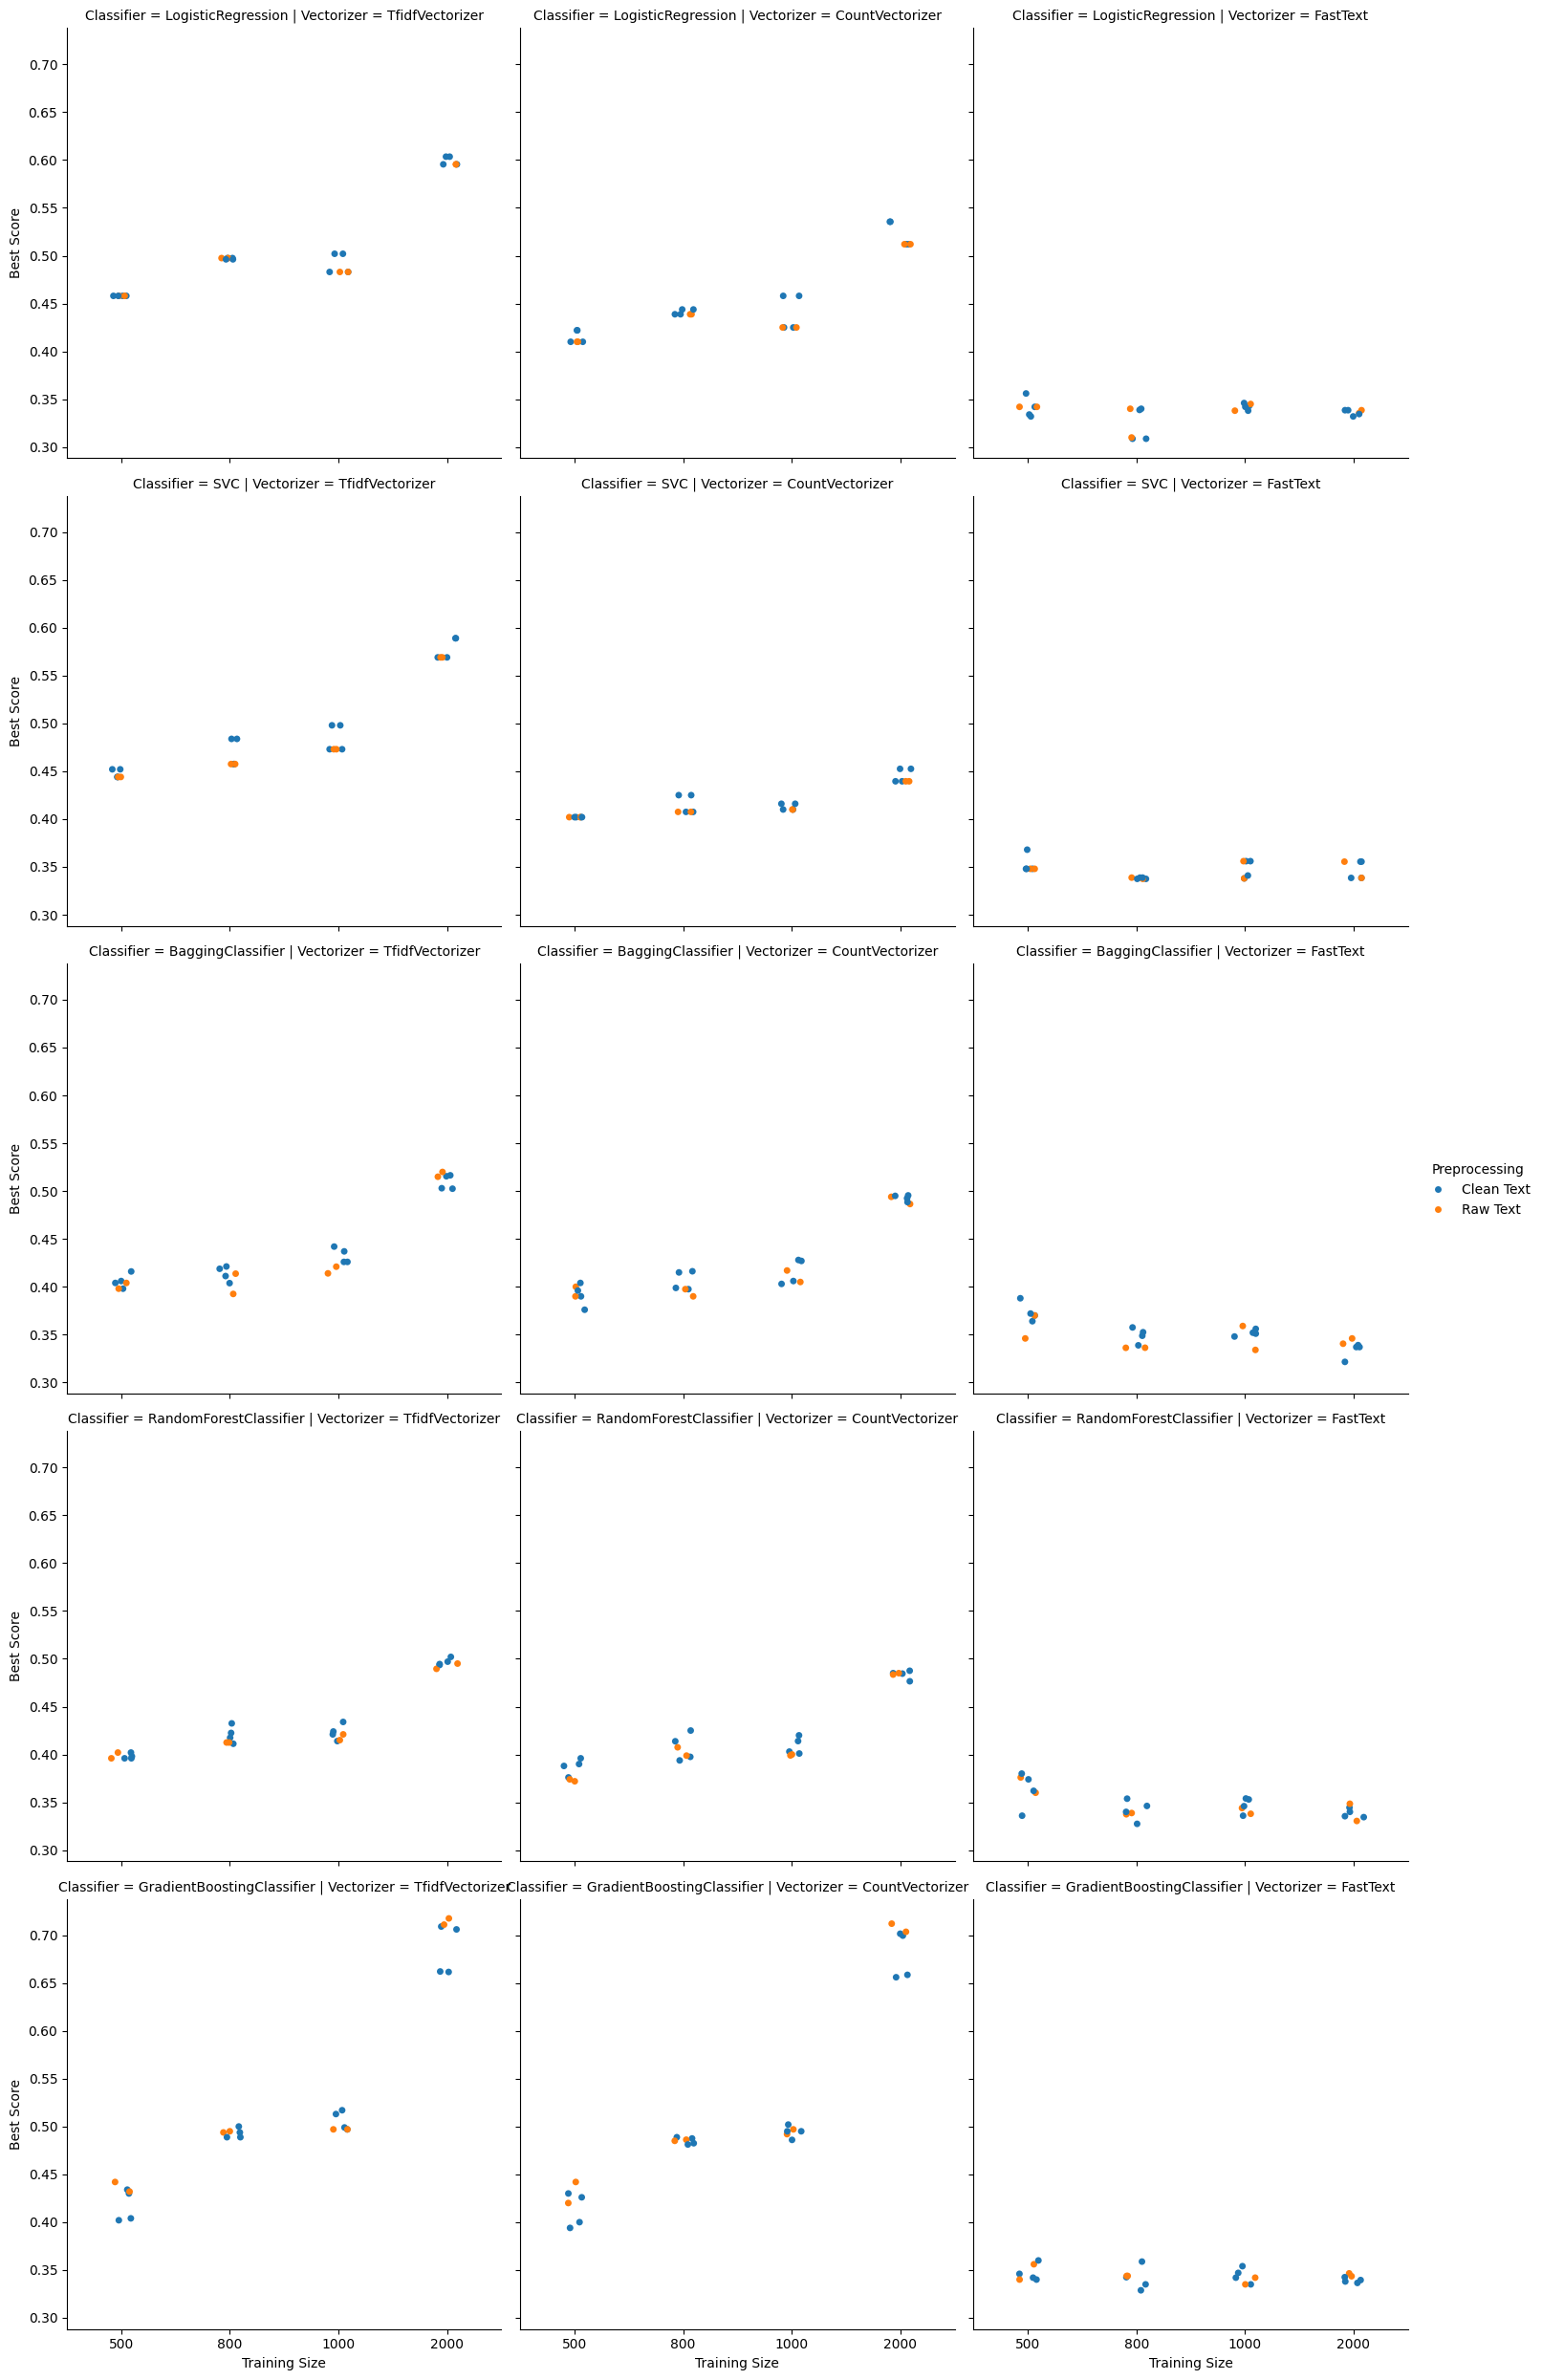

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Dataset: botting


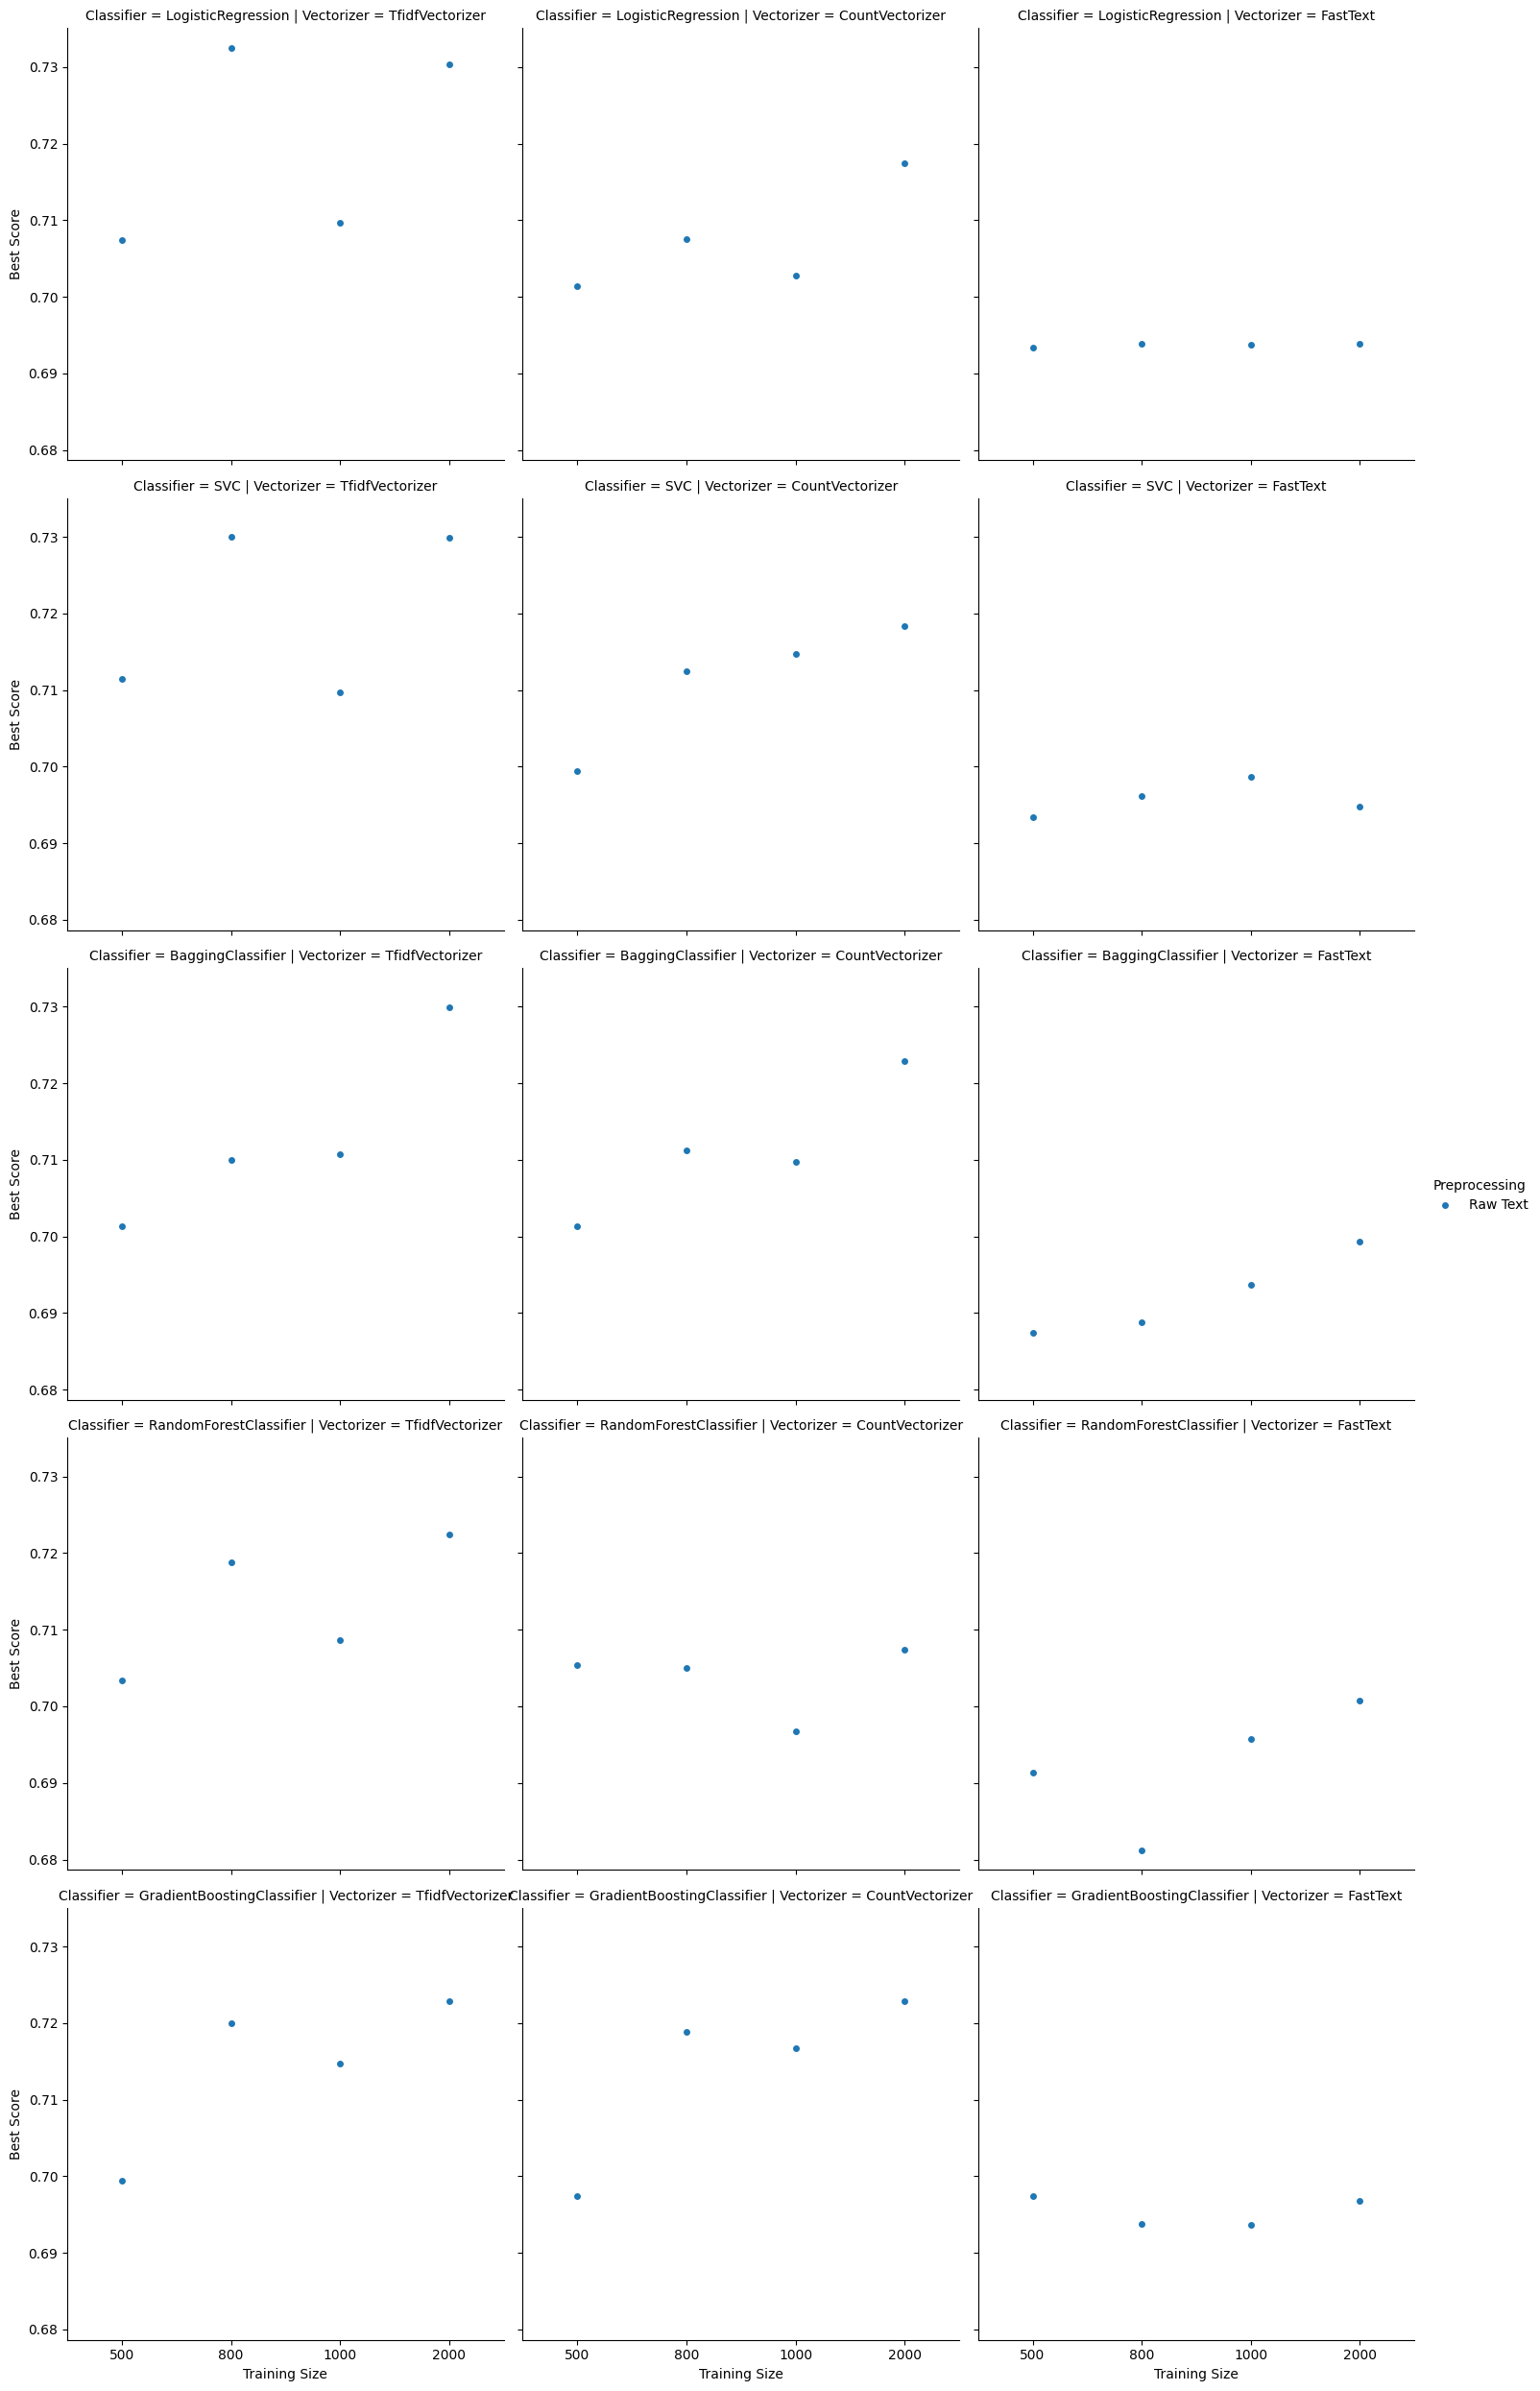

----------------------------------------------------------------------------------------------------------------------------------------------------------------

Dataset: sentiment


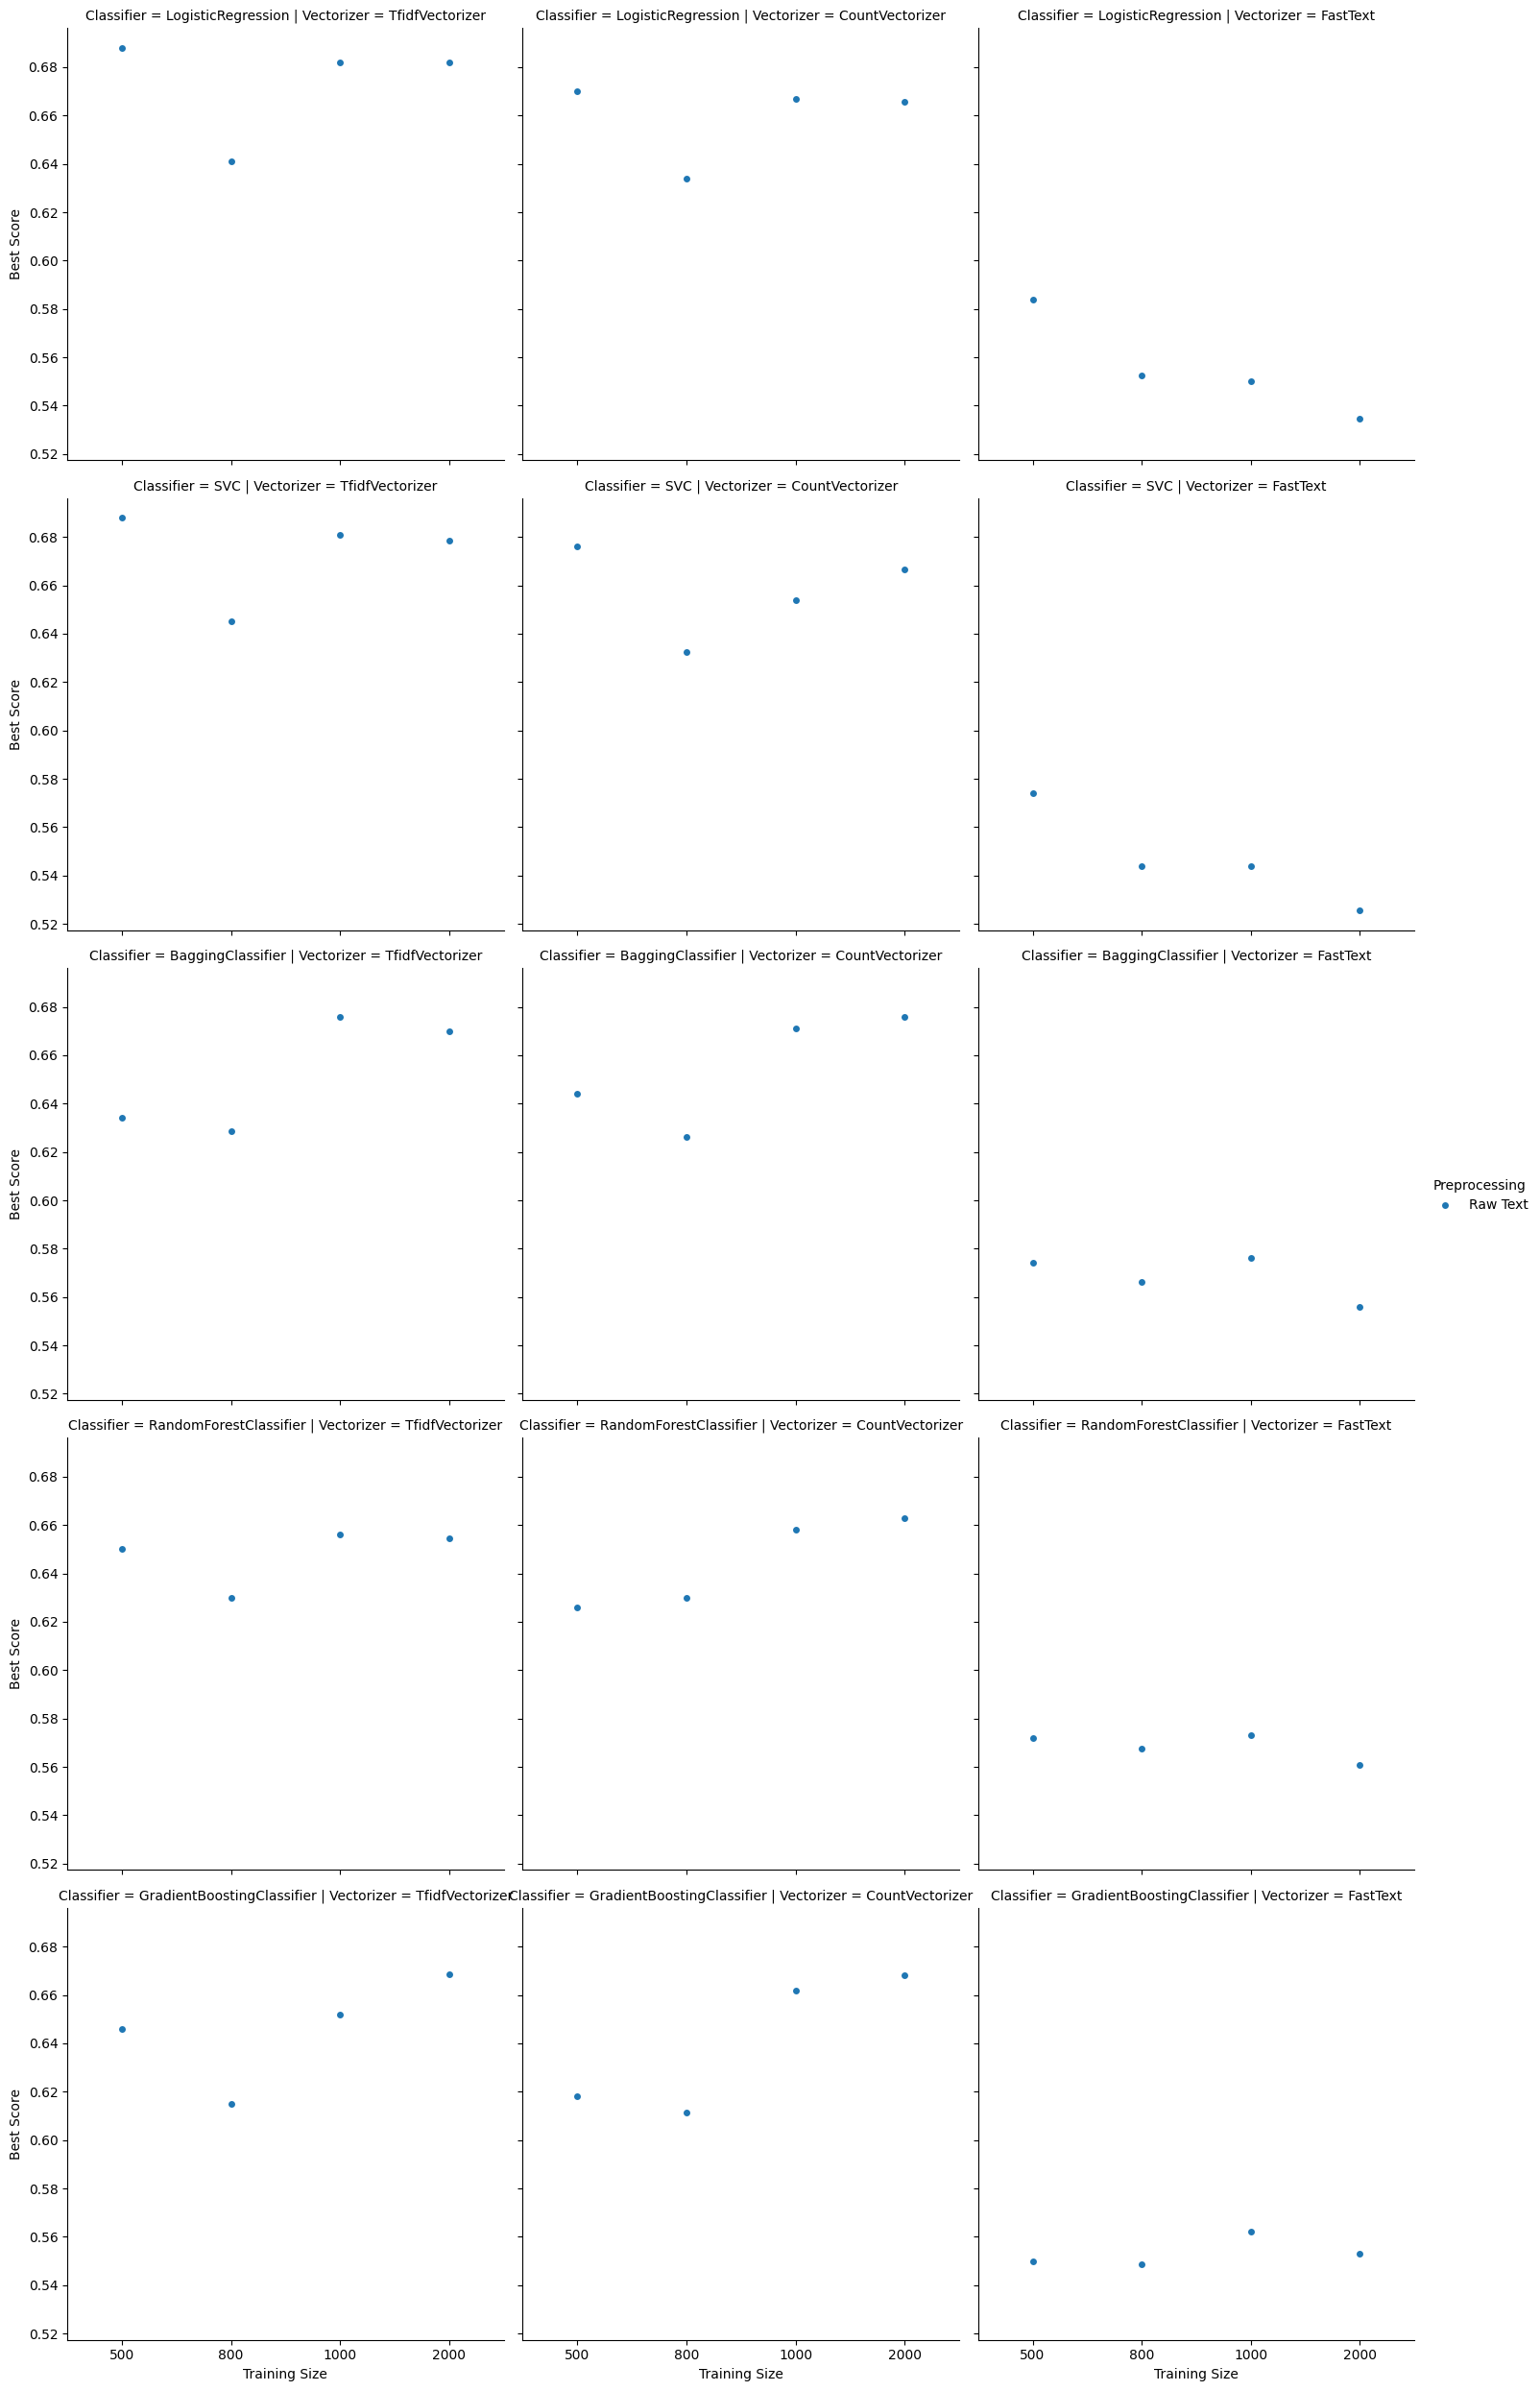

----------------------------------------------------------------------------------------------------------------------------------------------------------------



In [ ]:
for dataset in tune_results['Dataset'].unique():
  print(f'Dataset: {dataset}')
  temp = tune_results[(tune_results['Dataset'] == dataset)]
  sns.catplot(x = temp['Training Size'],
              y = temp['Best Score'],
              row = temp['Classifier'],
              col = temp['Vectorizer'],
              hue = temp['Preprocessing'])
  plt.show()
  print('----'*40 + '\n')

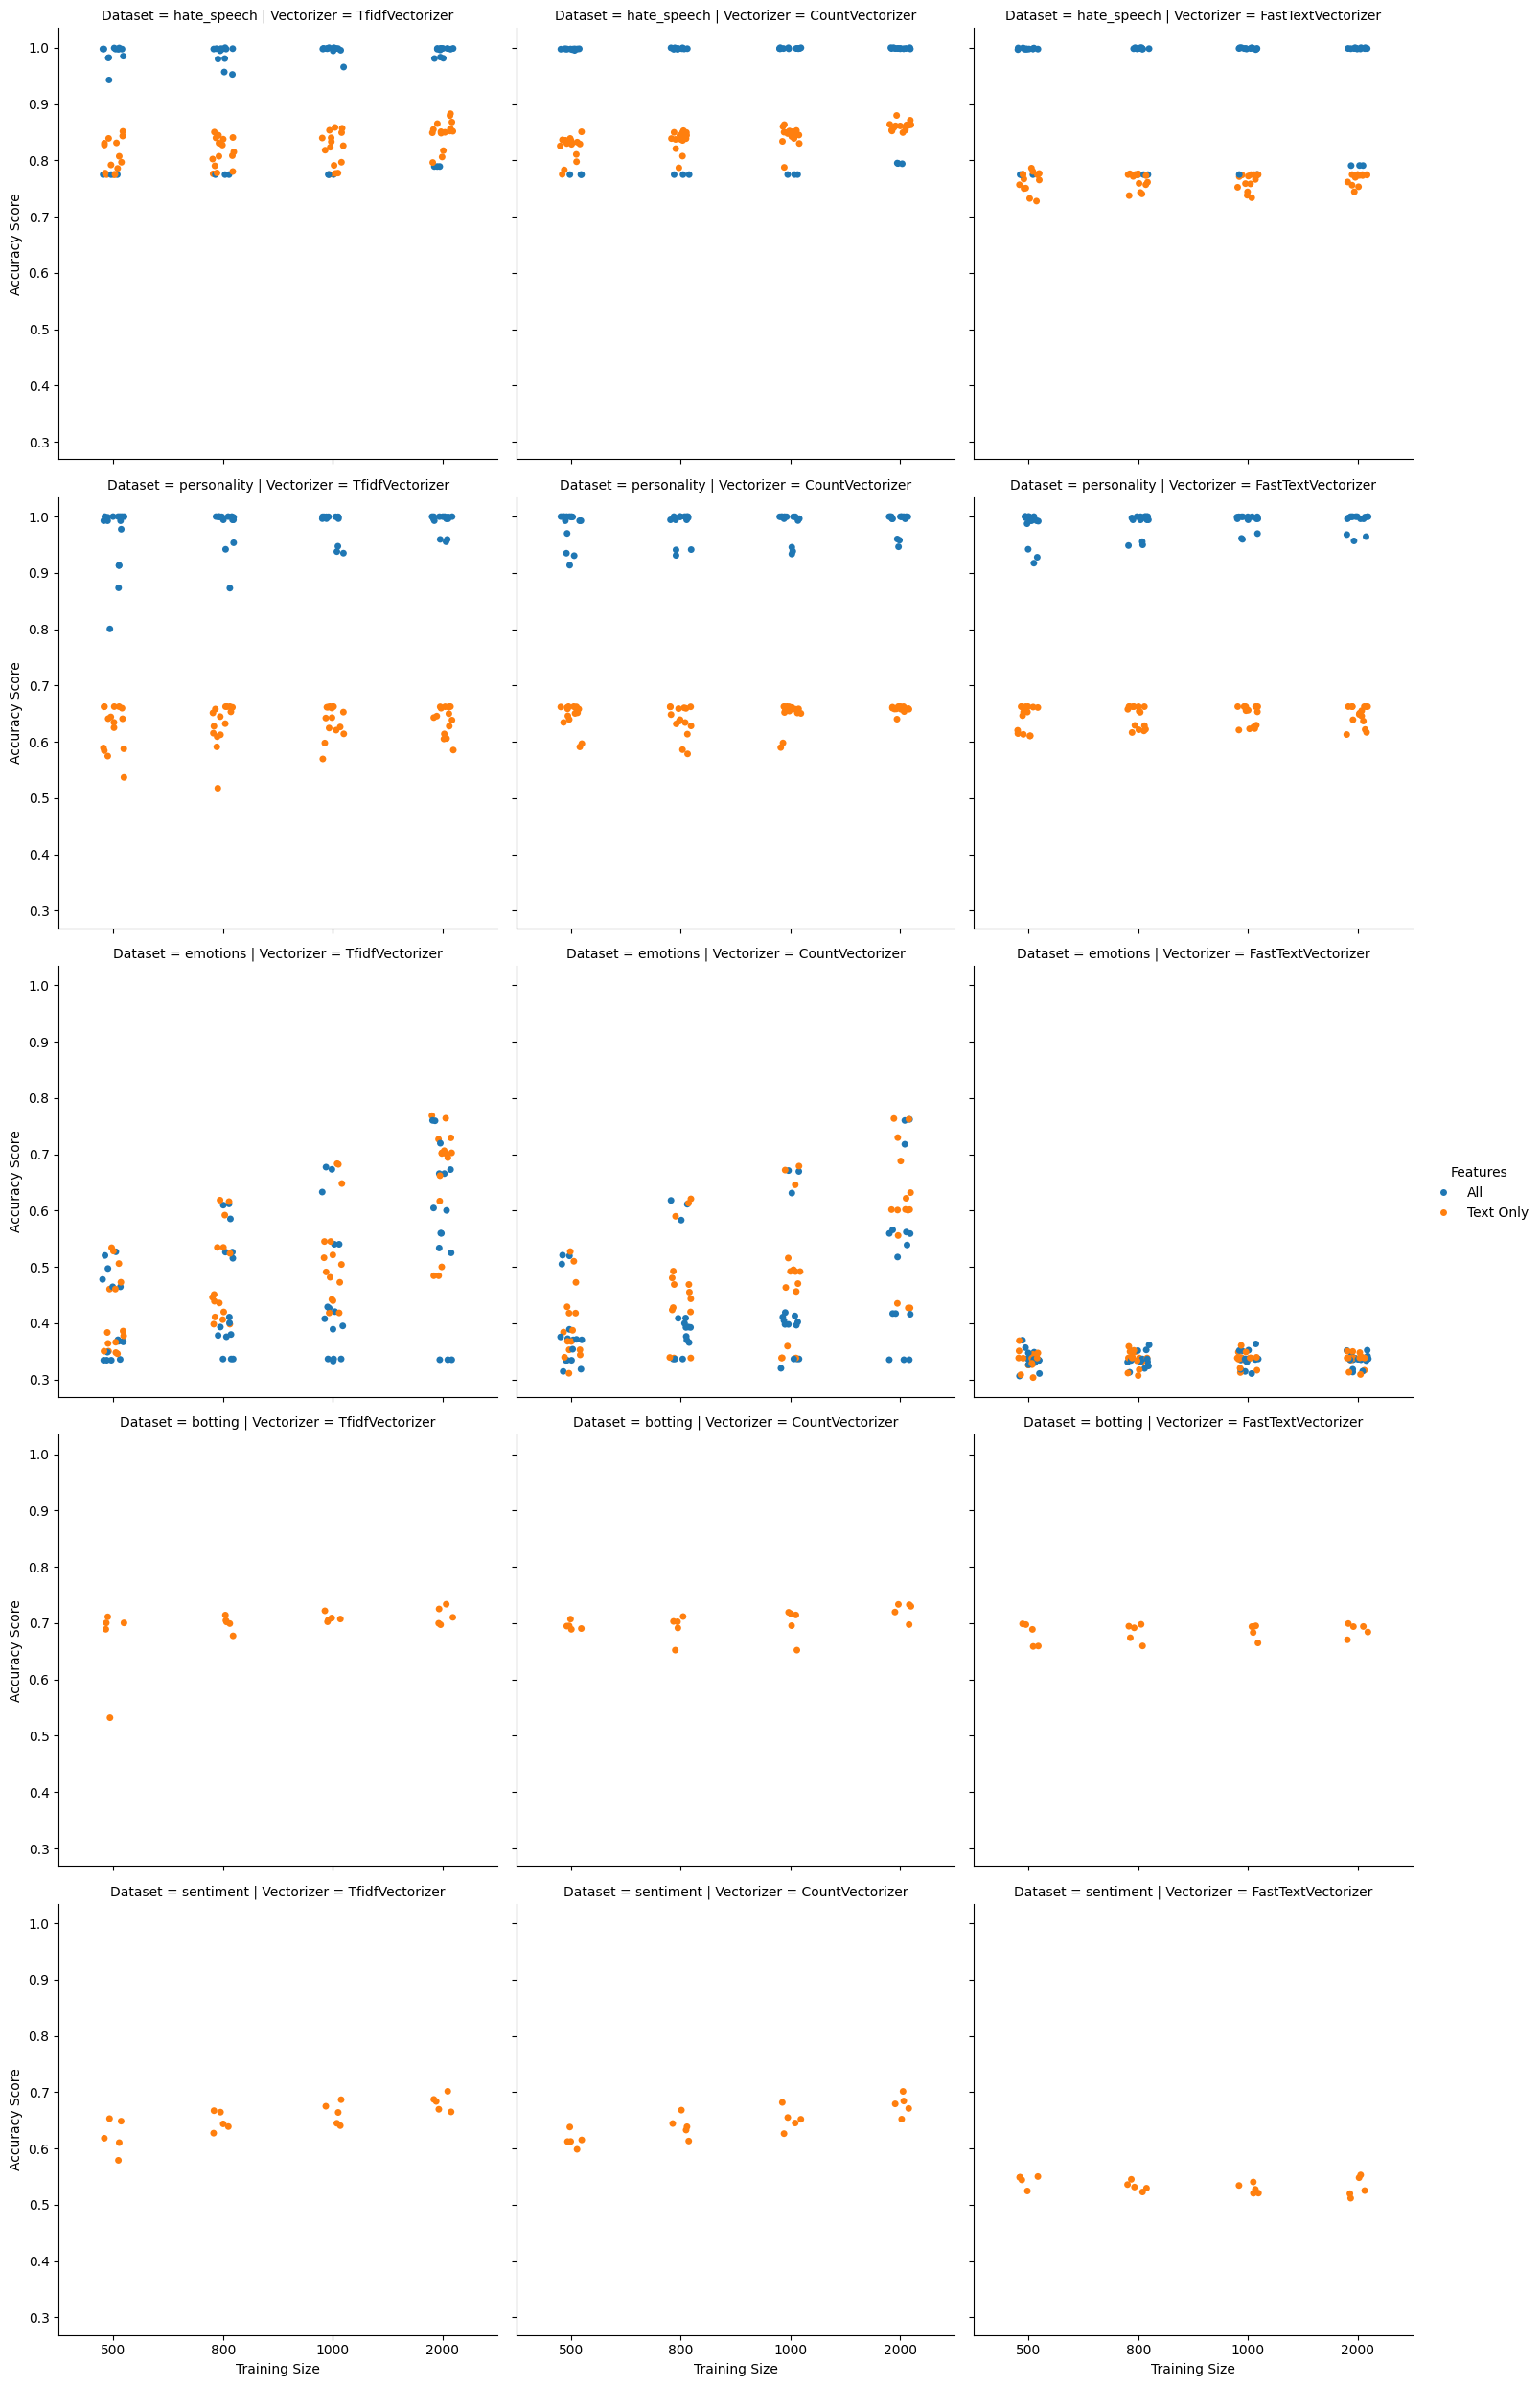

In [ ]:
sns.catplot(x = clf_results['Training Size'],
            y = clf_results['Accuracy Score'],
            row = clf_results['Dataset'],
            col = clf_results['Vectorizer'],
            hue = clf_results['Features'])

In [ ]:
for data_set in tune_results['Dataset'].unique():
  temp1 = tune_results[(tune_results['Dataset'] == data_set)]
  print(f'## {data_set} ##\n')
  for vectorizer in ['CountVectorizer', 'TfidfVectorizer', 'FastText']:
    temp2 = temp1[(temp1['Vectorizer'] == f'{vectorizer}')]
    print(f'# {vectorizer} #')
    print(f"Average score: {np.round(temp2['Best Score'].mean(), 3)}")
    print(f"Top score: {np.round(temp2['Best Score'].max(), 3)}")
    print(f"Maximum Processing time (m): {temp2['Duration (m)'].max()}")
    print(f"Maximum Processing cost (€): {temp2['Cost (€)'].max()}\n")
  print('----'*40)

## hate_speech ##

# CountVectorizer #
Average score: 0.84
Top score: 0.874
Maximum Processing time (m): 1.03
Maximum Processing cost (€): 0.0035

# TfidfVectorizer #
Average score: 0.835
Top score: 0.873
Maximum Processing time (m): 0.78
Maximum Processing cost (€): 0.0026

# FastText #
Average score: 0.883
Top score: 1.0
Maximum Processing time (m): 0.56
Maximum Processing cost (€): 0.0019

----------------------------------------------------------------------------------------------------------------------------------------------------------------
## personality ##

# CountVectorizer #
Average score: 0.666
Top score: 0.674
Maximum Processing time (m): 0.9
Maximum Processing cost (€): 0.003

# TfidfVectorizer #
Average score: 0.664
Top score: 0.68
Maximum Processing time (m): 0.97
Maximum Processing cost (€): 0.0033

# FastText #
Average score: 0.828
Top score: 1.0
Maximum Processing time (m): 0.3
Maximum Processing cost (€): 0.001

---------------------------------------------------

In [ ]:
for data_set in clf_results['Dataset'].unique():
  temp1 = clf_results[(clf_results['Dataset'] == data_set)]
  for features in ['Text Only', 'All']:
    temp3 = temp1[(temp1['Features'] == f'{features}')]
    print(f'## {data_set} - {features} ##\n')
    for vectorizer in ['CountVectorizer', 'TfidfVectorizer', 'FastTextVectorizer']:
      temp2 = temp3[(temp3['Vectorizer'] == f'{vectorizer}')]
      print(f'# {vectorizer} #')
      print(f"Average score: {np.round(temp2['Accuracy Score'].mean(), 3)}")
      print(f"Top score: {np.round(temp2['Accuracy Score'].max(), 3)}")
      print(f"Maximum Processing time (s): {temp2['Duration (s)'].max()}")
      print(f"Maximum Processing cost (€): {temp2['Cost (€)'].max()}\n")
    print('----'*40)

## hate_speech - Text Only ##

# CountVectorizer #
Average score: 0.841
Top score: 0.88
Maximum Processing time (s): 4.7
Maximum Processing cost (€): 0.0003

# TfidfVectorizer #
Average score: 0.822
Top score: 0.883
Maximum Processing time (s): 8.9
Maximum Processing cost (€): 0.0005

# FastTextVectorizer #
Average score: 0.765
Top score: 0.786
Maximum Processing time (s): 21.5
Maximum Processing cost (€): 0.0012

----------------------------------------------------------------------------------------------------------------------------------------------------------------
## hate_speech - All ##

# CountVectorizer #
Average score: 0.955
Top score: 1.0
Maximum Processing time (s): 11.6
Maximum Processing cost (€): 0.0007

# TfidfVectorizer #
Average score: 0.949
Top score: 1.0
Maximum Processing time (s): 11.0
Maximum Processing cost (€): 0.0006

# FastTextVectorizer #
Average score: 0.955
Top score: 1.0
Maximum Processing time (s): 21.8
Maximum Processing cost (€): 0.0012

------------

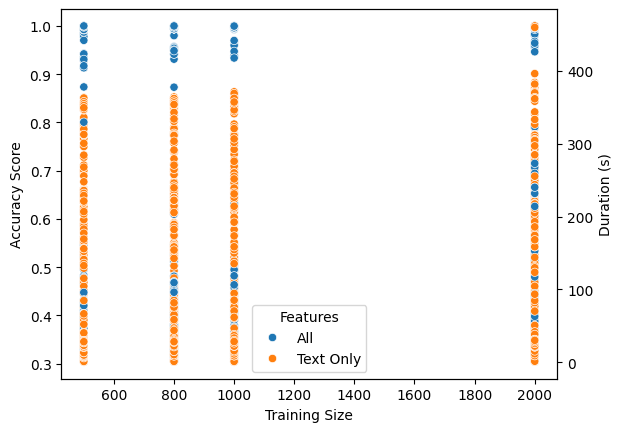

In [ ]:
sns.scatterplot(x = clf_results['Training Size'], y = clf_results['Accuracy Score'], hue = clf_results['Features'])
ax2 = plt.twinx()
sns.scatterplot(x = clf_results['Training Size'], y = clf_results['Duration (s)'], hue = clf_results['Features'])
plt.legend([], [], frameon=False)

In [ ]:
for dataset in clf_results['Dataset'].unique():
  temp = clf_results[(clf_results['Dataset'] == dataset)]
  print(f'## {dataset} ##\n')
  print(f"{temp.sort_values(['Accuracy Score', 'Duration (s)'], ascending = [False, True])[['Vectorizer', 'Features', 'Preprocessing', 'Accuracy Score', 'Duration (s)']].head(3)}")
  print('----'*40 + '\n')

## hate_speech ##

        Vectorizer Features     Preprocessing  Accuracy Score  Duration (s)
0  CountVectorizer      All        Clean Text             1.0           0.6
0  CountVectorizer      All  light_clean_text             1.0           0.8
0  TfidfVectorizer      All        Clean Text             1.0           1.3
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## personality ##

        Vectorizer Features     Preprocessing  Accuracy Score  Duration (s)
0  CountVectorizer      All  light_clean_text             1.0          14.3
0  CountVectorizer      All        Clean Text             1.0          14.4
0  CountVectorizer      All        Clean Text             1.0          14.5
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## emotions ##

        Vector

In [ ]:
for dataset in tune_results['Dataset'].unique():
  temp = tune_results[(tune_results['Dataset'] == dataset)]
  print(f'## {dataset} ##\n')
  print(f"{temp.sort_values(['Best Score', 'Duration (m)'], ascending = [False, True])[['Classifier', 'Vectorizer', 'Features', 'Preprocessing', 'Best Score', 'Duration (m)']].head(3)}")
  print('----'*40 + '\n')

## hate_speech ##

           Classifier Vectorizer Features Preprocessing  Best Score  \
0  LogisticRegression   FastText      All    Clean Text         1.0   
0  LogisticRegression   FastText      All      Raw Text         1.0   
0  LogisticRegression   FastText      All    Clean Text         1.0   

   Duration (m)  
0          0.01  
0          0.01  
0          0.01  
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## personality ##

  Classifier Vectorizer Features Preprocessing  Best Score  Duration (m)
0        SVC   FastText      All    Clean Text         1.0          0.01
0        SVC   FastText      All      Raw Text         1.0          0.01
0        SVC   FastText      All    Clean Text         1.0          0.01
-------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
for dataset in clf_results['Dataset'].unique():
  temp = clf_results[(clf_results['Dataset'] == dataset)]
  print(f'## {dataset} ##\n')
  print(f"{temp.sort_values(['Accuracy Score', 'Duration (s)'], ascending = [False, True])['Best Parameters'].head(1)[0]}")
  print('----'*40 + '\n')

## hate_speech ##

(max_df=0.5, max_features=1000, ngram_range=(1, 2))
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## personality ##

(max_df=0.5, max_features=1000, ngram_range=(2, 2))
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## emotions ##

(max_df=0.25, max_features=10000, ngram_range=(1, 2), norm=None)
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## botting ##

(max_df=0.25, ngram_range=(1, 3), norm=None)
----------------------------------------------------------------------------------------------------------------------------------------------------------------

## sentiment ##

(max_df=0.25, max_features=5000, ngram_range=(1, 2))